In [ ]:
import numpy as np
from collections import Counter

def entropy(y):
    all_p= np.bincount(y)/len(y)
    a=[p*np.log2(p) for p in all_p if p>0]
    return - np.sum(np.array(a))

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None) :
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    # min_samples_split is stopping criteria. other criterias include
    def __init__(self,min_samples_split=2,max_depth=100, n_feats=None) :
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root=None

    def fit(self,x_train,y_train):
        self.n_feats=x_train.shape[1] if not self.n_feats else min(self.n_feats,x_train.shape[1])
        self.root= self.grow_tree(x_train,y_train)

    def grow_tree(self,x,y,depth=0):
        n_samples,n_features=x.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth) or (n_labels==1) or (n_samples==self.min_samples_split):
            leaf_value = self.most_common_layer(y)
            return Node(value=leaf_value)

        feat_index =np.random.choice(n_features,self.n_feats,replace=False)
        best_feat,best_thresh = self.best_criteria(x,y,feat_index)

        left_idxs,right_idxs = self.split(x[:,best_feat], best_thresh)
        left= self.grow_tree(x[left_idxs,:], y[left_idxs],depth=depth+1)
        right= self.grow_tree(x[right_idxs,:], y[right_idxs],depth=depth+1)
        return Node(best_feat, best_thresh, left, right)

    def most_common_layer(self,y):
        c=Counter(y).most_common(1)[0][0]
        return c

    def best_criteria(self,x,y,feat_index):
        best_gain=-1
        split_idx,split_thresh = None,None
        for feat_idx in feat_index:
            x_Column=x[:,feat_idx]
            thresholds=np.unique(x_Column)
            for threshold in thresholds:
                gain=self.information_gain(y,x_Column,threshold)

                if gain>best_gain:
                    best_gain=gain
                    split_idx=feat_idx
                    split_thresh=threshold
        return split_idx, split_thresh

    def information_gain(self,y,x_Column, split_thresh):
        parent_entropy=entropy(y)
        left_idxs,right_idxs = self.split(x_Column,split_thresh)
        if len(left_idxs)==0 or len(right_idxs)==0:
            return 0
        n=len(y)
        n_l,n_r=len(left_idxs),len(right_idxs)
        e_l,e_r=entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l/n)*e_l  + (n_r/n)*e_r
        return parent_entropy - child_entropy

    
    def split(self,x_Column,split_thresh):
        left_idxs=np.argwhere(x_Column<=split_thresh).flatten()
        right_idxs=np.argwhere(x_Column>split_thresh).flatten()
        return left_idxs,right_idxs

    
    def predict(self,x_test):
        return np.array([self.traverse_tree(x, self.root)  for x in x_test])

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature]<=node.threshold:
            return self.traverse_tree(x,node.left)

        return self.traverse_tree(x,node.right)
        

In [ ]:
# Loading data
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
x,y = iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [ ]:
# Use the Model
clf=DecisionTree(max_depth=5)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.9


In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf3= DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf3.fit(x_train,y_train)
y_pred= clf3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


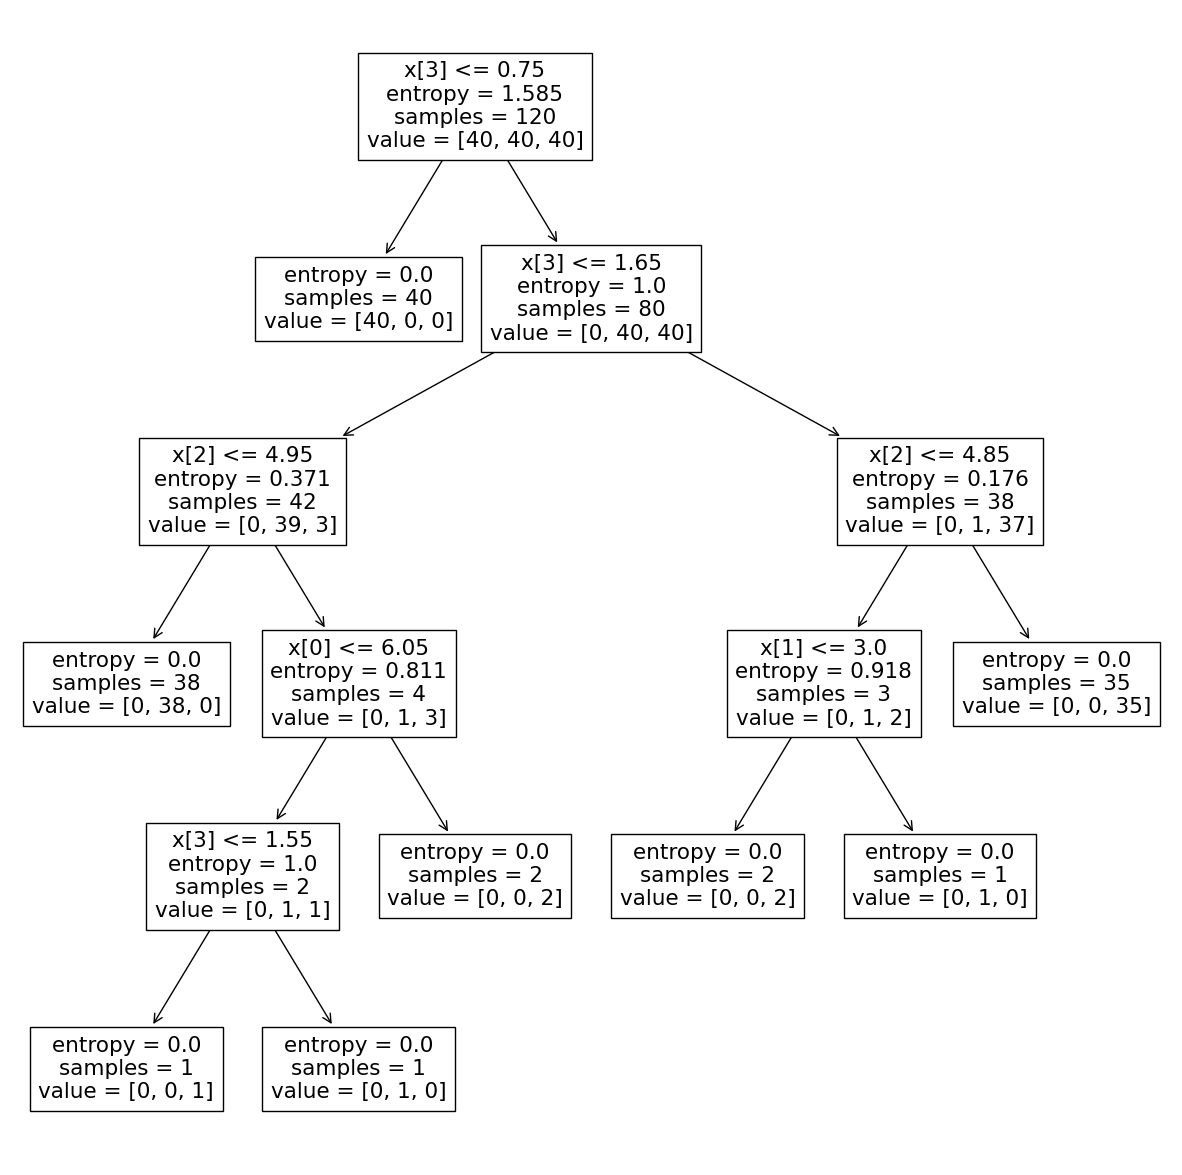

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plot_tree(decision_tree=clf3,max_depth=5)
plt.savefig("dtree.png")
plt.show()

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_df['Iris name'] = iris['target']
iris_df['Iris name'] = iris_df['Iris name'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [ ]:
iris_df = iris_df.sample(frac = 1)
iris_df[:20]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris name
123,6.3,2.7,4.9,1.8,virginica
27,5.2,3.5,1.5,0.2,sentosa
55,5.7,2.8,4.5,1.3,versicolor
61,5.9,3.0,4.2,1.5,versicolor
17,5.1,3.5,1.4,0.3,sentosa
142,5.8,2.7,5.1,1.9,virginica
34,4.9,3.1,1.5,0.2,sentosa
118,7.7,2.6,6.9,2.3,virginica
14,5.8,4.0,1.2,0.2,sentosa
105,7.6,3.0,6.6,2.1,virginica
